In [1]:
import pandas as pd

df = pd.read_csv('uber.csv')  # Replace with actual filename
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [2]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [4]:
df.isnull().sum()
df.dropna(inplace=True)  # Or handle with appropriate imputations


In [7]:
df.to_csv('cleaned_uber.csv', index=False)


In [8]:
df.describe(include='all')


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.999990e+05,199999,199999.000000,199999,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
unique,NaN,199999,NaN,196628,NaN,NaN,NaN,NaN,NaN
top,NaN,2010-05-15 04:08:00.00000076,NaN,2009-02-12 12:46:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771248e+07,NaN,11.359892,NaN,-72.527631,39.935881,-72.525292,39.923890,1.684543
std,1.601386e+07,NaN,9.901760,NaN,11.437815,7.720558,13.117408,6.794829,1.385995
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382534e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774524e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155535e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


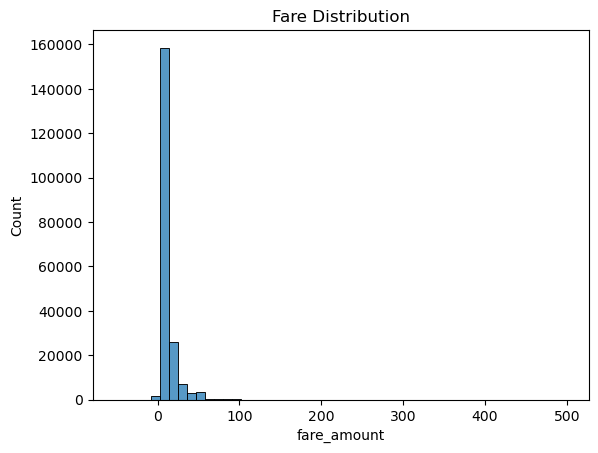

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['fare_amount'], bins=50)
plt.title('Fare Distribution')
plt.show()


<Axes: xlabel='trip_distance', ylabel='fare_amount'>

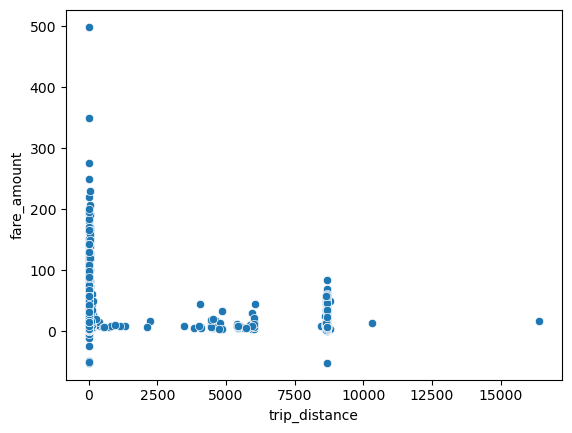

In [19]:
sns.scatterplot(x='trip_distance', y='fare_amount', data=df)


In [12]:
df.columns


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [14]:
import numpy as np

# Haversine function to calculate distance between two points on Earth
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)

    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply the function to your dataframe
df['trip_distance'] = haversine(
    df['pickup_latitude'],
    df['pickup_longitude'],
    df['dropoff_latitude'],
    df['dropoff_longitude']
)


In [15]:
df[['trip_distance', 'fare_amount']].head()


,trip_distance,fare_amount
0,1.683323,7.5
1,2.457590,7.7
2,5.036377,12.9
3,1.661683,5.3
4,4.475450,16.0


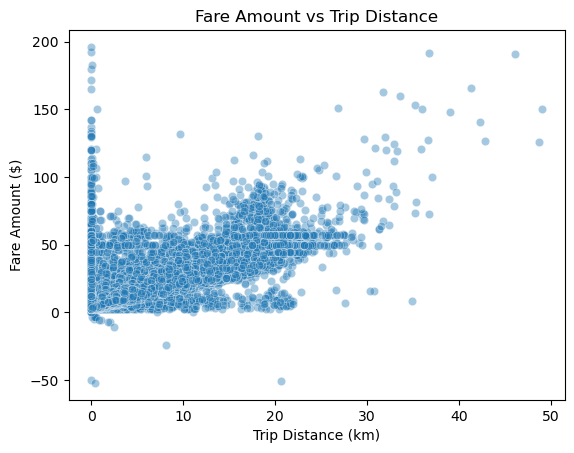

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: filter out extreme outliers for better visualization
df_filtered = df[(df['trip_distance'] < 50) & (df['fare_amount'] < 200)]

sns.scatterplot(x='trip_distance', y='fare_amount', data=df_filtered, alpha=0.4)
plt.title('Fare Amount vs Trip Distance')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.show()


In [18]:
df.to_csv('enhanced_uber.csv', index=False)


In [20]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['weekday'] = df['pickup_datetime'].dt.day_name()
df['peak_time'] = df['hour'].apply(lambda x: 'Peak' if 7 <= x <= 9 or 17 <= x <= 19 else 'Off-Peak')


In [21]:
df['weekday'] = df['weekday'].astype('category')


In [22]:
df.to_csv('enhanced_uber.csv', index=False)
